# Testing `dataloading` modules `_io.py` functionality

**Authorship:**
Adam Klie, *03/02/2022*
***
**Description:**
Notebook for implementing `dataloading` modules I/O functins in `_io.py`

In [83]:
import os
import numpy as np
import pandas as pd

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

from pkg_resources import resource_filename
import eugene as eu

# READ

In [157]:
refgenome = resource_filename(
    'eugene',
    'external/janggu/resources/sample_genome.fa'
)
roi_file = resource_filename(
    'eugene',
    'external/janggu/resources/sample.bed'
)
bed_file = resource_filename(
    'eugene',
    'external/janggu/resources/scored_sample.bed'
)
bam_file = resource_filename(
    'eugene',
    'external/janggu/resources/sample2.bam')
bw_file = resource_filename(
    'eugene',
    'external/janggu/resources/sample.bw')                                              
refgenome, roi_file, bed_file, bam_file, bw_file

('/mnt/beegfs/users/aklie/projects/EUGENe/eugene/external/janggu/resources/sample_genome.fa',
 '/mnt/beegfs/users/aklie/projects/EUGENe/eugene/external/janggu/resources/sample.bed',
 '/mnt/beegfs/users/aklie/projects/EUGENe/eugene/external/janggu/resources/scored_sample.bed',
 '/mnt/beegfs/users/aklie/projects/EUGENe/eugene/external/janggu/resources/sample2.bam',
 '/mnt/beegfs/users/aklie/projects/EUGENe/eugene/external/janggu/resources/sample.bw')

## `read_bed`

In [85]:
# Read the docs
eu.dl.read_bed?

Signature:
eu.dl.read_bed(
    bed_file: str,
    roi_file: str,
    ref_file: str,
    dnaflank=None,
    resolution=None,
    collapser='max',
    add_seqs=False,
    return_janggu=False,
    **kwargs,
)
Docstring:
Read a BED file and return a DataFrame.

Parameters
----------
bed_file : str
    Path to the BED file where peaks are stored.
roi_file : str
    Path to the file containing the regions of interest under consideration.
ref_file : str
    Path to the genome reference file.
dnaflank : int, optional
    Number of nucleotides to flank the sequence. Defaults to None.
resolution : int, optional
    Resolution of the sequence. Defaults to None.
collapser : str, optional
    Collapser to use. Defaults to "max".
add_seqs : bool, optional
    Add sequences to the DataFrame. Defaults to False.
return_janggu : bool, optional
    Return a Janggu object. Defaults to False.
**kwargs : dict
    Additional arguments to pass to as Janggu's parameters for loading

Returns
-------
sdata : Seq

In [93]:
# Set-up a simple function call to read to sdata
sdata = eu.dl.read_bed(
    bed_file=bed_file,
    roi_file=roi_file,  
    ref_file=refgenome,
    binsize=200, 
    collapser="max",
    dnaflank=50,
    add_seqs=True,
    return_janggu=False
)

In [116]:
# Add the chrosomal and range information from the index
eu.pp.add_ranges_annot(sdata)

In [120]:
# Split in train and test by chromosomes!
eu.pp.train_test_split_data(sdata, chr="chr2")

SeqData object modified:
    seqs_annot:
        + train


In [121]:
sdata.seqs_annot

,target,chr,start,end,train
chr1:14950-15250,0.0,chr1,14950,15250,True
chr1:15150-15450,0.0,chr1,15150,15450,True
chr1:15350-15650,0.0,chr1,15350,15650,True
chr1:15550-15850,1.0,chr1,15550,15850,True
chr1:15750-16050,1.0,chr1,15750,16050,True
...,...,...,...,...,...
chr2:23950-24250,0.0,chr2,23950,24250,False
chr2:24150-24450,0.0,chr2,24150,24450,False
chr2:24350-24650,0.0,chr2,24350,24650,False
chr2:24550-24850,0.0,chr2,24550,24850,False


In [136]:
model = eu.models.DeepBind(input_len=300, output_dim=1)

In [137]:
eu.predict.predictions(model, sdata=sdata, target="target")

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


No transforms given, assuming just need to tensorize).


/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:662: UserWarning: Your `predict_dataloader` has `shuffle=True`, it is strongly recommended that you turn this off for val/test/predict dataloaders.
  category=UserWarning,
/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Predicting: 0it [00:00, ?it/s]

SeqData object modified:
    seqs_annot:
        + target_predictions


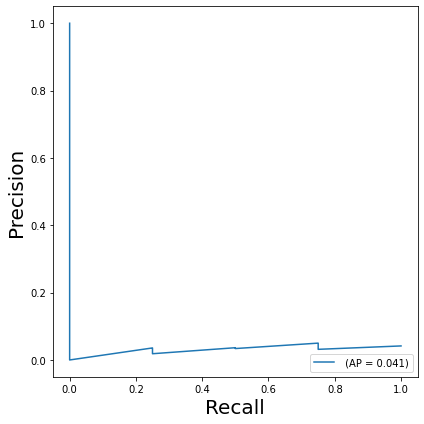

In [143]:
eu.pl.auprc(sdata, targets="target", predictions="target_predictions")

In [144]:
# Just a test of Janggu style return
dna, cov = eu.dl.read_bed(
    bed_file=bed_file,
    roi_file=roi_file,  
    ref_file=refgenome,
    binsize=200, 
    collapser="max",
    dnaflank=50,
    return_janggu=True
)

## `read_bam`

In [187]:
eu.dl.read_bam?

Signature:
eu.dl.read_bam(
    bam_file: str,
    roi_file: str,
    ref_file: str,
    dnaflank=0,
    resolution=None,
    normalizer=None,
    add_seqs=False,
    return_janggu=False,
    **kwargs,
)
Docstring:
Read a BAM file and return a DataFrame.

Parameters
----------
bam_file : str
    Path to the BED file where peaks are stored.
roi_file : str
    Path to the file containing the regions of interest under consideration.
ref_file : str
    Path to the genome reference file.
dnaflank : int, optional
    Number of nucleotides to flank the sequence. Defaults to None.
resolution : int, optional
    Resolution of the sequence. Defaults to None.
collapser : str, optional
    Collapser to use. Defaults to "max".
add_seqs : bool, optional
    Add sequences to the DataFrame. Defaults to False.
return_janggu : bool, optional
    Return a Janggu object. Defaults to False.
**kwargs : dict
    Additional arguments to pass to as Janggu's parameters for loading

Returns
-------
sdata : SeqDat

In [191]:
sdata = eu.dl.read_bam(
    bam_file, 
    roi_file, 
    refgenome, 
    binsize=200, 
    resolution=25
)

In [192]:
eu.pp.add_ranges_annot(sdata)

SeqData object modified:
    seqs_annot:
        + start, chr, end


In [193]:
sdata.seqs_annot

,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,chr,start,end
chr1:15000-15200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chr1,15000,15200
chr1:15200-15400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chr1,15200,15400
chr1:15400-15600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chr1,15400,15600
chr1:15600-15800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chr1,15600,15800
chr1:15800-16000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chr1,15800,16000
...,...,...,...,...,...,...,...,...,...,...,...
chr2:24000-24200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chr2,24000,24200
chr2:24200-24400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chr2,24200,24400
chr2:24400-24600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chr2,24400,24600
chr2:24600-24800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chr2,24600,24800


## `read_bigwig`

In [207]:
eu.dl.read_bigwig?

Signature:
eu.dl.read_bigwig(
    bigwig_file: str,
    roi_file: str,
    ref_file: str,
    dnaflank=0,
    resolution=None,
    collapser='max',
    add_seqs=False,
    return_janggu=False,
    **kwargs,
)
Docstring:
Read a bigwig file and return a DataFrame.

Parameters
----------
bigwig_file : str
    Path to the bigwig file where peaks are stored.
roi_file : str
    Path to the file containing the regions of interest under consideration.
ref_file : str
    Path to the genome reference file.
dnaflank : int, optional
    Number of nucleotides to flank the sequence. Defaults to None.
resolution : int, optional
    Resolution of the sequence. Defaults to None.
collapser : str, optional
    Collapser to use. Defaults to "max".
add_seqs : bool, optional
    Add sequences to the DataFrame. Defaults to False.
return_janggu : bool, optional
    Return a Janggu object. Defaults to False.
**kwargs : dict
    Additional arguments to pass to as Janggu's parameters for loading

Returns
-------

In [208]:
sdata = eu.dl.read_bigwig(
    bigwig_file=bw_file,
    roi_file=roi_file,
    ref_file=refgenome,
    dnaflank=50,
    binsize=200,
    resolution=None,
    collapser="max"
)

In [209]:
sdata.seqs_annot

,target_0
chr1:14950-15250,0.0
chr1:15150-15450,0.0
chr1:15350-15650,0.0
chr1:15550-15850,0.0
chr1:15750-16050,1.0
...,...
chr2:23950-24250,0.0
chr2:24150-24450,1.0
chr2:24350-24650,1.0
chr2:24550-24850,0.0


## `read`

In [211]:
eu.dl.read(
    seq_file=bed_file,
    roi_file=roi_file,
    ref_file=refgenome,
    binsize=200,
    collapser="max",
    dnaflank=50,
    add_seqs=True,
    return_janggu=False
)

SeqData object with = 100 seqs
seqs = (100,)
names = (100,)
rev_seqs = (100,)
ohe_seqs = (100, 300, 4)
ohe_rev_seqs = None
seqs_annot: 'target'
pos_annot: None
seqsm: None
uns: None

In [213]:
eu.dl.read(
    seq_file=bam_file,
    roi_file=roi_file,
    ref_file=refgenome,
    binsize=200,
    resolution=25,
    dnaflank=25,
)

SeqData object with = 100 seqs
seqs = None
names = (100,)
rev_seqs = None
ohe_seqs = (100, 250, 4)
ohe_rev_seqs = None
seqs_annot: 'target_0', 'target_1', 'target_2', 'target_3', 'target_4', 'target_5', 'target_6', 'target_7'
pos_annot: None
seqsm: None
uns: None

In [215]:
eu.dl.read(
    seq_file=bw_file,
    roi_file=roi_file,
    ref_file=refgenome,
    binsize=100,
    resolution=None,
    collapser="mean"
)

SeqData object with = 200 seqs
seqs = None
names = (200,)
rev_seqs = None
ohe_seqs = (200, 100, 4)
ohe_rev_seqs = None
seqs_annot: 'target_0'
pos_annot: None
seqsm: None
uns: None

In [70]:
cov[:].squeeze()[:5]

array([0., 0., 0., 1., 1.])

In [43]:
dna.gindexer.__dict__

{'_binsize': 200,
 '_stepsize': 200,
 '_flank': 50,
 'chrs': ['chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',


In [44]:
dna.shape

(100, 300, 1, 4)

In [46]:
dna.garray.__dict__.keys()

dict_keys(['stranded', '_condition', '_order', 'padding_value', '_resolution', 'typecode', '_full_genome_stored', 'collapser', 'region2index', 'handle'])

array(['chr1:14950-15250', 'chr1:15150-15450', 'chr1:15350-15650',
       'chr1:15550-15850', 'chr1:15750-16050', 'chr1:15950-16250',
       'chr1:16150-16450', 'chr1:16350-16650', 'chr1:16550-16850',
       'chr1:16750-17050', 'chr1:16950-17250', 'chr1:17150-17450',
       'chr1:17350-17650', 'chr1:17550-17850', 'chr1:17750-18050',
       'chr1:17950-18250', 'chr1:18150-18450', 'chr1:18350-18650',
       'chr1:18550-18850', 'chr1:18750-19050', 'chr1:18950-19250',
       'chr1:19150-19450', 'chr1:19350-19650', 'chr1:19550-19850',
       'chr1:19750-20050', 'chr1:19950-20250', 'chr1:20150-20450',
       'chr1:20350-20650', 'chr1:20550-20850', 'chr1:20750-21050',
       'chr1:20950-21250', 'chr1:21150-21450', 'chr1:21350-21650',
       'chr1:21550-21850', 'chr1:21750-22050', 'chr1:21950-22250',
       'chr1:22150-22450', 'chr1:22350-22650', 'chr1:22550-22850',
       'chr1:22750-23050', 'chr1:22950-23250', 'chr1:23150-23450',
       'chr1:23350-23650', 'chr1:23550-23850', 'chr1:23750-240

In [51]:
dna.garray.handle["data"].shape

(100, 300, 1, 1)

In [58]:
cov[:].squeeze()

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
cov.garray.handle["data"].squeeze()

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [56]:
cov.gindexer.__dict__

{'_binsize': 200,
 '_stepsize': 200,
 '_flank': 0,
 'chrs': ['chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr1',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
  'chr2',
 

In [9]:
sdata

SeqData object with = 100 seqs
seqs = (100,)
names = None
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'target'
pos_annot: None
seqsm: None
uns: None

## JunD Data

In [2]:
input_dir = '/cellar/users/aklie/data/eugene/junD'

In [3]:
bed_file = os.path.join(
    input_dir,
    "jund_raw_peaks.bed" 
)
roi_file = os.path.join(
    input_dir,
    "trim_roi_jund_extended.bed"
)
refgenome = os.path.join(
    input_dir,
    "hg38.fa"
)
bed_file, roi_file, refgenome

('/cellar/users/aklie/data/eugene/junD/jund_raw_peaks.bed',
 '/cellar/users/aklie/data/eugene/junD/trim_roi_jund_extended.bed',
 '/cellar/users/aklie/data/eugene/junD/hg38.fa')

In [ ]:
sdata = read_bed(
    bed_file=bed_file,
    roi_file=roi_file,
    ref_file=refgenome,
    dnaflank=150
    binsize=200,
    resolution=200
)

KeyboardInterrupt: 

: 

In [8]:
LABELS = eu.external.janggu.data.Cover.create_from_bed(
    'jund_peaks',
    bedfiles=bed_file,
    roi=roi_file,
    binsize=200,
    conditions=['JunD'],
    resolution=200,
)

In [9]:
LABELS.shape

(1013080, 1, 1, 1)

In [12]:
np.unique(LABELS[:].squeeze(), return_counts=True)

(array([0., 1.]), array([985230,  27850]))

In [13]:
DNA = eu.external.janggu.data.Bioseq.create_from_refgenome(
    'dna', 
    refgenome=refgenome,
    roi=roi_file,
    binsize=200,
    flank=150
)

In [14]:
DNA.shape

(1013080, 500, 1, 4)

In [15]:
DNA[:][:, :, 0, :].shape

(1013080, 500, 4)

---

# Scratch


```python
def read_bed(
    bed_file: str,
    roi_file: str,
    ref_file: str,
    dnaflank=None,
    resolution=None,
    collapser="max",
    add_seqs=False,
    return_janggu=False,
    **kwargs
):
    """
    Read a BED file and return a DataFrame.

    Parameters
    ----------
    bed_file : str
        Path to the BED file where peaks are stored.
    roi_file : str
        Path to the file containing the regions of interest under consideration.
    ref_file : str
        Path to the genome reference file.
    kwargs : dict
        Additional arguments to pass to as Janggu's parameters for loading
    
    Returns
    -------
    sdata : SeqData
        SeqData object containing the peaks.
    """
    dna = eu.external.janggu.data.Bioseq.create_from_refgenome(
        name='dna',
        refgenome=ref_file,
        roi=roi_file,
        flank=dnaflank,
        **kwargs
    )
    cover = eu.external.janggu.data.Cover.create_from_bed(
        'cover',
        bedfiles=bed_file,
        roi=roi_file,
        resolution=resolution,
        collapser=collapser,
        **kwargs
    )
    if return_janggu:
        return dna, cover
    ids = np.array(list(dna.garray.region2index.keys()))
    ohe_seqs = dna[:][:, :, 0, :]
    targets = cover[:].squeeze()
    seqs = np.array(eu.pp.decode_DNA_seqs(ohe_seqs)) if add_seqs else None
    return eu.dl.SeqData(
            names=ids,
            seqs=seqs,
            ohe_seqs=ohe_seqs,
            rev_seqs=None,
            seqs_annot=pd.DataFrame(data=targets, index=ids, columns=["target"]),
        )


from eugene.preprocessing import decode_DNA_seqs, reverse_complement_seqs
from eugene.dataloading import SeqData
def read_bam(
    bam_file: str,
    roi_file: str,
    ref_file: str,
    dnaflank=0,
    resolution=None,
    normalizer=None,
    add_seqs=False,
    return_janggu=False,
    **kwargs
):
    """
    Read a BAM file and return a DataFrame.

    Parameters
    ----------
    bam_file : str
        Path to the BED file where peaks are stored.
    roi_file : str
        Path to the file containing the regions of interest under consideration.
    ref_file : str
        Path to the genome reference file.
    dnaflank : int, optional
        Number of nucleotides to flank the sequence. Defaults to None.
    resolution : int, optional
        Resolution of the sequence. Defaults to None.
    collapser : str, optional
        Collapser to use. Defaults to "max".
    add_seqs : bool, optional
        Add sequences to the DataFrame. Defaults to False.
    return_janggu : bool, optional
        Return a Janggu object. Defaults to False.
    **kwargs : dict
        Additional arguments to pass to as Janggu's parameters for loading
    
    Returns
    -------
    sdata : SeqData
        SeqData object containing the peaks.
    """
    dna = eu.external.janggu.data.Bioseq.create_from_refgenome(
        name='dna',
        refgenome=ref_file,
        roi=roi_file,
        flank=dnaflank,
        **kwargs
    )
    cover = eu.external.janggu.data.Cover.create_from_bam(
        'cover',
        bamfiles=bam_file,
        roi=roi_file,
        resolution=resolution,
        normalizer=normalizer,
        stranded=False,
        **kwargs
    )
    if return_janggu:
        return dna, cover
    ids = np.array(list(dna.garray.region2index.keys()))
    ohe_seqs = dna[:][:, :, 0, :]
    targets = cover[:].squeeze(axis=(2,3))
    seqs = np.array(decode_DNA_seqs(ohe_seqs)) if add_seqs else None
    rev_seqs = np.array(reverse_complement_seqs(seqs)) if add_seqs else None
    return SeqData(
            names=ids,
            seqs=seqs,
            ohe_seqs=ohe_seqs,
            rev_seqs=rev_seqs,
            seqs_annot=pd.DataFrame(
                data=targets, 
                index=ids, 
                columns=[f'target_{i}' for i in range(targets.shape[1])]
            )
        )


from eugene.dataloading import SeqData
from eugene.preprocessing import decode_DNA_seqs, reverse_complement_seqs
def read_bigwig(
    bigwig_file: str,
    roi_file: str,
    ref_file: str,
    dnaflank=0,
    resolution=None,
    collapser="max",
    add_seqs=False,
    return_janggu=False,
    **kwargs
):
    """
    Read a bigwig file and return a DataFrame.

    Parameters
    ----------
    bigwig_file : str
        Path to the bigwig file where peaks are stored.
    roi_file : str
        Path to the file containing the regions of interest under consideration.
    ref_file : str
        Path to the genome reference file.
    dnaflank : int, optional
        Number of nucleotides to flank the sequence. Defaults to None.
    resolution : int, optional
        Resolution of the sequence. Defaults to None.
    collapser : str, optional
        Collapser to use. Defaults to "max".
    add_seqs : bool, optional
        Add sequences to the DataFrame. Defaults to False.
    return_janggu : bool, optional
        Return a Janggu object. Defaults to False.
    **kwargs : dict
        Additional arguments to pass to as Janggu's parameters for loading
    
    Returns
    -------
    sdata : SeqData
        SeqData object containing the peaks.
    """
    dna = eu.external.janggu.data.Bioseq.create_from_refgenome(
        name='dna',
        refgenome=ref_file,
        roi=roi_file,
        flank=dnaflank,
        **kwargs
    )
    cover = eu.external.janggu.data.Cover.create_from_bigwig(
        'cover',
        bigwigfiles=bigwig_file,
        roi=roi_file,
        resolution=resolution,
        collapser=collapser,
        **kwargs
    )
    if return_janggu:
        return dna, cover
    ids = np.array(list(dna.garray.region2index.keys()))
    ohe_seqs = dna[:][:, :, 0, :]
    targets = cover[:].squeeze(axis=(2,3))
    seqs = np.array(decode_DNA_seqs(ohe_seqs)) if add_seqs else None
    rev_seqs = np.array(reverse_complement_seqs(seqs)) if add_seqs else None
    return SeqData(
            names=ids,
            seqs=seqs,
            ohe_seqs=ohe_seqs,
            rev_seqs=rev_seqs,
            seqs_annot=pd.DataFrame(
                data=targets, 
                index=ids, 
                columns=[f'target_{i}' for i in range(targets.shape[1])]
            )
        )   
```